## Simple returns

In [2]:
#importing
import numpy as np
from pandas_datareader import data as wd
import matplotlib.pyplot as plt

In [3]:
#importing data from stock PG from yahoo finance
from pandas_datareader import data as pdr
import datetime
import yfinance as yf

yf.pdr_override()

start = datetime.datetime(1995, 1, 1).date()

#PG
PG = pdr.get_data_yahoo('PG',start=start)

[*********************100%***********************]  1 of 1 completed


In [4]:
PG.head()
#head

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.674551,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.613037,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.505372,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.520754,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.489995,1795200


In [5]:
PG.tail()
#tail

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-17,149.649994,150.160004,148.970001,148.990005,148.057144,4625300
2023-07-18,148.639999,150.479996,148.380005,149.270004,148.335388,5355200
2023-07-19,149.550003,150.820007,148.860001,150.289993,149.348999,6203600
2023-07-20,149.550003,150.750000,148.139999,150.559998,150.559998,6445400
2023-07-21,151.149994,153.669998,150.699997,152.929993,152.929993,9938100


## simple rate of return

### (p1 - p0)/p0 = p1/p0 - 1

In [7]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print(PG['simple_return'])
#first day fo trading = Nan as the was no closing price the day before

Date
1995-01-03         NaN
1995-01-04   -0.008015
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2023-07-17   -0.007064
2023-07-18    0.001879
2023-07-19    0.006833
2023-07-20    0.008109
2023-07-21    0.015741
Name: simple_return, Length: 7188, dtype: float64


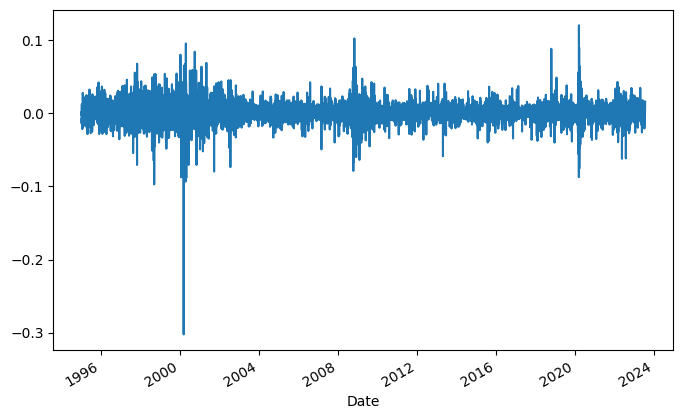

In [9]:
# plotting on a graph
PG['simple_return'].plot(figsize=(8,5))
plt.show()
#daily returns, note that positive returns are often followed by negitave returns as regression to the mean comes in to play

### positive returns compund over time , negitave returns are more instant

In [10]:
mean_return = PG['simple_return'].mean()
mean_return
#daily mean return

0.0005153350762018664

In [11]:
# avg annual rate of return
mean_aar_return = PG['simple_return'].mean() * 250
mean_aar_return

0.12883376905046662

In [12]:
str(round(mean_aar_return, 5)*100)+' %'
#avrage annual return of stock PG

'12.883 %'